<a href="https://colab.research.google.com/github/SabrinaRoses/Data_Science/blob/main/Lisbon_aribnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto: Verificar os dados da Airbnb na Região de Lisboa - Potugal
Objetivo: Média de valores, Regiões mais procuradas e datas de maiores procuras



1.   Baixe os dados.
2.   Importe as biblioteca necessárias.
3.   Carregue os Dados.
4.   Explore e Analise os Dados.
5.   Comunique relátorios.




In [10]:
#Importando Biblioteca
import pandas as pd

In [11]:
# Especifique o caminho para o arquivo CSV (De inicio farei com listing)
listing_arquivo =  'listings.csv.gz'

# Carregue os dados em um DataFrame
df = pd.read_csv(listing_arquivo)

In [12]:
#Exiba as primeiras linhas do DataFrame
print(df.head())

       id                          listing_url       scrape_id last_scraped  \
0    6499    https://www.airbnb.com/rooms/6499  20230911050651   2023-09-11   
1   25659   https://www.airbnb.com/rooms/25659  20230911050651   2023-09-12   
2  119120  https://www.airbnb.com/rooms/119120  20230911050651   2023-09-12   
3   29248   https://www.airbnb.com/rooms/29248  20230911050651   2023-09-12   
4  122572  https://www.airbnb.com/rooms/122572  20230911050651   2023-09-12   

            source                                               name  \
0      city scrape  Rental unit in Lisbon · ★4.52 · 1 bedroom · 3 ...   
1      city scrape  Rental unit in Lisboa · ★4.81 · 1 bedroom · 1 ...   
2      city scrape  Rental unit in Lisbon · ★4.89 · 2 bedrooms · 2...   
3      city scrape  Rental unit in Lisbon · ★4.57 · 1 bedroom · 2 ...   
4  previous scrape  Rental unit in Lisboa · 1 bedroom · 1 bed · 1 ...   

                                         description  \
0  This apartment is all about

In [13]:
#Verifique informações sobre tipos de dados e valores ausentes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22605 entries, 0 to 22604
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22605 non-null  int64  
 1   listing_url                                   22605 non-null  object 
 2   scrape_id                                     22605 non-null  int64  
 3   last_scraped                                  22605 non-null  object 
 4   source                                        22605 non-null  object 
 5   name                                          22605 non-null  object 
 6   description                                   22586 non-null  object 
 7   neighborhood_overview                         13429 non-null  object 
 8   picture_url                                   22605 non-null  object 
 9   host_id                                       22605 non-null 

In [14]:
#Mostrar tabela preço e fazer uma média
print(df['price'])

0         $79.00
1         $88.00
2        $135.00
3        $128.00
4         $62.00
          ...   
22600    $108.00
22601    $186.00
22602     $84.00
22603    $235.00
22604    $350.00
Name: price, Length: 22605, dtype: object


In [15]:
#Limpar a coluna price, removendo caracteres não númericos.
df['price'] = df['price'].str.replace('[\$,]', '', regex=True)

In [16]:
#Converter a coluna price em números de ponto fluante(float)
df['price'] = df['price'].astype(float)

In [17]:
#Calcule a média ds preços
media_precos = df['price'].mean()
print(media_precos)

160.60513160805132


In [18]:
#Contar bairros sem repetir nomes e mostrar
bairros_unicos = df['neighbourhood'].unique()
print("Bairros únicos:")
for bairro in bairros_unicos:
  print(bairro)

Bairros únicos:
Lisbon, Portugal
Lisboa, Portugal
nan
Lisbon, city center, Portugal
Cascais, Lisbon, Portugal
Sintra, Lisboa, Portugal
Alenquer, Lisbon, Portugal
Ericeira, Lisboa, Portugal
Cascais, Lisboa, Portugal
Lisbon, Lisboa, Portugal
Lisbon, Colares, Sintra, Portugal
Lourinhã, Lisbon, Portugal
Mafra , Lisbon, Portugal
Colares, Lisboa, Portugal
Lisbon, Lisbon District, Portugal
Torres Vedras, Lisbon, Portugal
Sintra, Lisbon, Portugal
Fontanelas - Sintra, Lisbon, Portugal
Cadaval Municipality, Lisbon, Portugal
Rio de Mouro, Lisboa, Portugal
Oeiras, Lisbon, Portugal
Estoril, Lisboa, Portugal
Amadora, Lisbon District, Portugal
Lisbon, Bairro Alto, Portugal
Ericeira, Lisbon, Portugal
Estoril, Cascais, Portugal
MAFRA, LISBON, Portugal
Lisbon, Estremadura, Portugal
Terrugem, Lisboa, Portugal
Ramalhal, Lisboa, Portugal
Ericeira, Lisbon District, Portugal
Cascais, Lisbon District, Portugal
São João do Estoril, Lisboa, Portugal
Parede, Lisbon District, Portugal
São João do Estoril, Lisbon,

In [25]:
# Use o método 'value_counts' para contar as ocorrências de cada bairro
contagem_bairros = df['neighbourhood'].value_counts()

# Encontre o bairro com o maior número de ocorrências
bairro_mais_pesquisado = contagem_bairros.idxmax()
numero_de_ocorrencias = contagem_bairros.max()

print(f'O bairro mais pesquisado é "{bairro_mais_pesquisado}" com {numero_de_ocorrencias} ocorrências.')


O bairro mais pesquisado é "Lisboa, Portugal" com 8530 ocorrências.


Visualização de Analises

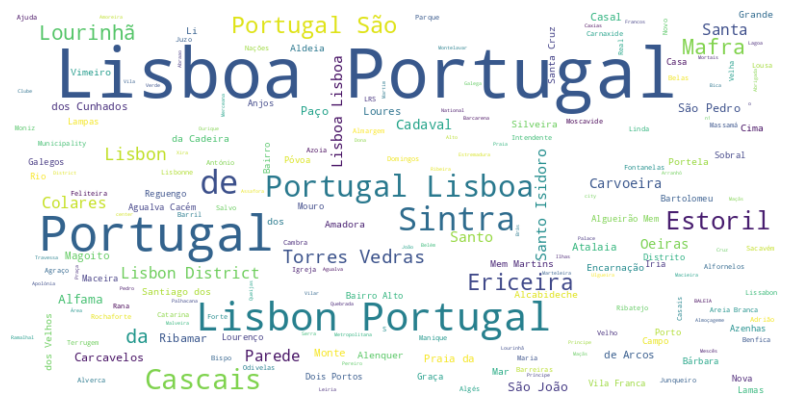

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Remover valores Nulos
df_cleaned = df.dropna(subset=['neighbourhood'])

# Remover Duplicados
df_cleaned = df_cleaned.drop_duplicates(subset=['neighbourhood'])

# Suponha que 'df' seja o seu DataFrame e 'neighbourhood' seja a coluna com os nomes dos bairros
text = " ".join(str(neighbourhood) for neighbourhood in df_cleaned['neighbourhood'])

# Crie uma instância do WordCloud com as configurações desejadas
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plote a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



In [28]:
#Verificar noites
df['minimum_nights'].head()

0    3
1    2
2    3
3    5
4    1
Name: minimum_nights, dtype: int64

In [29]:
#verificar média
df['minimum_nights'].mean()

4.196549435965494

In [37]:
#Tratando review
df.dropna(subset=['review_scores_rating'])

#Calcule a media geral
review_media = df['review_scores_rating'].mean()

#Preencher valores nulos com media geral
df['review_scores_rating'].fillna(review_media, inplace=True)

In [40]:
#Verificar review media por região
#calcular media de reviw para cada região
media_por_regiao = df_cleaned.groupby('neighbourhood')['review_scores_rating'].mean().reset_index()

#Ordene o dataFrame pela ordem descrecente
media_por_regiao = media_por_regiao.sort_values(by='review_scores_rating', ascending=False)

#exibir
print(media_por_regiao)


                                neighbourhood  review_scores_rating
151        Ericeira, Ericeira-Mafra, Portugal                   5.0
434  Vila Franca do Rosário, Lisboa, Portugal                   5.0
271                 Maçussa, Lisboa, Portugal                   5.0
270                Matacães, Lisboa, Portugal                   5.0
328             Prior Velho, Lisboa, Portugal                   5.0
..                                        ...                   ...
394  Sobral de Monte Agraço, Lisbon, Portugal                   NaN
406     São João do Estoril, Lisboa, Portugal                   NaN
431                Vialonga, Lisboa, Portugal                   NaN
435  Vila Verde dos Francos, Lisboa, Portugal                   NaN
436          Vilar, Cadaval, Lisbon, Portugal                   NaN

[445 rows x 2 columns]


In [43]:
#Verificar datas
# Especifique o caminho de datas
calendar_arquivo = 'calendar.csv.gz'

#Carregue os dados em um DataFrame
df_calendar = pd.read_csv(calendar_arquivo)

In [44]:
#Verificar as 5 primeiras linhas
df_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,6499,2023-09-11,f,$79.00,$79.00,3.0,365.0
1,6499,2023-09-12,f,$79.00,$79.00,3.0,365.0
2,6499,2023-09-13,f,$79.00,$79.00,3.0,365.0
3,6499,2023-09-14,f,$79.00,$79.00,3.0,365.0
4,6499,2023-09-15,f,$79.00,$79.00,3.0,365.0


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['listing_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'listing_id'}, axis=1)
              .sort_values('listing_id', ascending=True))
  xs = counted['listing_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('listing_id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('listing_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['minimum_nights']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'minimum_nights'}, axis=1)
              .sort_values('minimum_nights', ascending=True))
  xs = counted['minimum_nights']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('minimum_nights', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('minimum_nights')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['maximum_nights']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'maximum_nights'}, axis=1)
              .sort_values('maximum_nights', ascending=True))
  xs = counted['maximum_nights']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('maximum_nights', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('maximum_nights')
_ = plt.ylabel('count()')

In [48]:
#Verificar informçãoes e valores nulos
print(df_calendar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250877 entries, 0 to 8250876
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 440.6+ MB
None


In [46]:
df_calendar.describe()

,listing_id,minimum_nights,maximum_nights
count,8.250877e+06,8.250840e+06,8.250840e+06
mean,2.860880e+17,7.120362e+00,1.320239e+04
std,3.912854e+17,3.495134e+01,5.179645e+06
min,6.499000e+03,1.000000e+00,1.000000e+00
25%,2.018832e+07,2.000000e+00,3.300000e+02
50%,4.062746e+07,2.000000e+00,1.125000e+03
75%,7.114165e+17,3.000000e+00,1.125000e+03
max,9.766682e+17,1.000000e+03,2.147484e+09
